In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
plt.gray()

<Figure size 432x288 with 0 Axes>

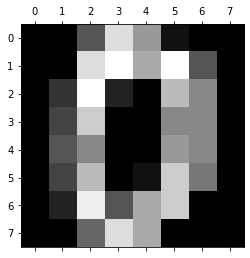

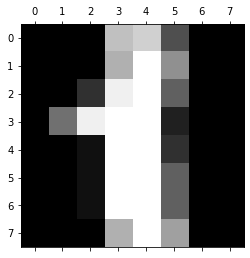

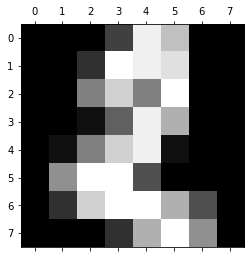

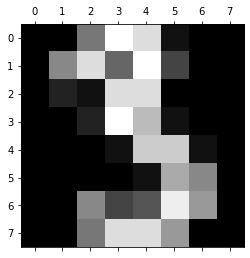

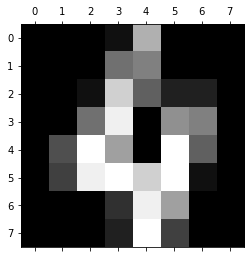

In [10]:
for i in range(5):
    plt.matshow(digits.images[i])

In [11]:
df = pd.DataFrame(digits.data)

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
df['target'] = digits.target

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
from sklearn.model_selection import train_test_split

In [22]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
model.score(X_test,y_test)

0.9694444444444444

In [34]:
y_predicted = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_predicted,y_test)
cm

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 44,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 33]], dtype=int64)

Text(33.0, 0.5, 'Truth')

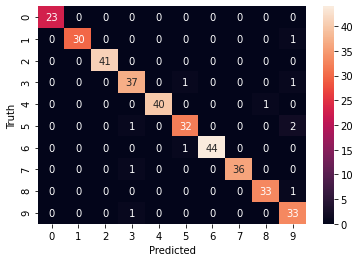

In [39]:
import matplotlib.pyplot as plt
import seaborn as sn
#plt.figure(figsize = (5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')